In [129]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import medfilt
from os.path import join
from correlate import norm_correlate

with open('/Users/zachkeskinen/Documents/infrasound/data/eq_sigs.pkl', 'rb') as f:
    sigs = pickle.load(f)

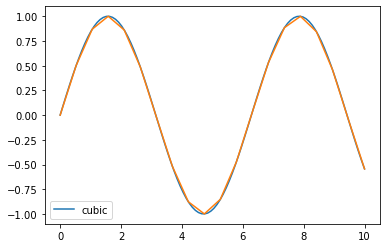

In [64]:
from scipy.interpolate import CubicSpline

x = np.linspace(0, 10, 20)
xs = np.linspace(0, 10, 100)
y = np.sin(x)
cs = CubicSpline(x, y)
plt.plot(xs,cs(xs), label = 'cubic')
plt.plot(x,y)
plt.legend()

Text(0.5, 0, 'Time Lag in Seconds')

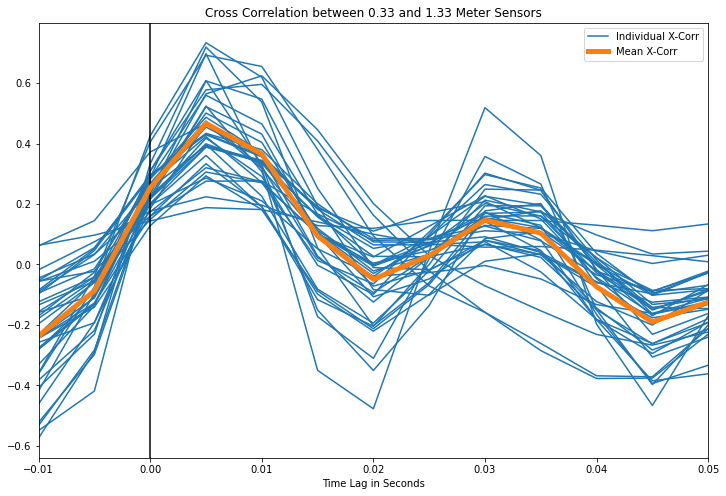

In [51]:
f, ax = plt.subplots(figsize = (12,8))
for i, t in enumerate(sigs.keys()):
    a = sigs[t][1.33].values.ravel()
    b = sigs[t][0.33].values.ravel()
    c, l = norm_correlate(a, b )
    l = l/200
    if i == 0:
        cs = c
        ax.plot(l, c, color = 'C0', label = 'Individual X-Corr')
    else:
        cs = cs + c
        ax.plot(l, c, color = 'C0')
ax.set_xlim(-0.01, 0.05)
ax.axvline(0, color = 'black')
ax.plot(l, cs/i, color = 'C1', linewidth = 5, label = 'Mean X-Corr')
ax.legend()
plt.title('Cross Correlation between 0.33 and 1.33 Meter Sensors')
plt.xlabel('Time Lag in Seconds')

In [88]:
import seaborn as sns
sns.set(
        rc={
 'axes.axisbelow': True,
 'axes.edgecolor': 'grey',
 'axes.facecolor': 'None',
 'axes.grid': True,
 'axes.grid.axis':'y',
 'axes.labelcolor': 'black',
 'axes.linewidth': 1,
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'lightgrey',
 'figure.figsize': (18, 12),
#  'font.family':'Arial',
 'grid.color': 'grey',
 'grid.alpha':1,
 'grid.linewidth':0.5,
 'image.aspect':'auto',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'savefig.dpi':300,
 'text.color': 'black',
 'xtick.bottom': False,
 'xtick.color': 'grey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'grey',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.color':'grey',
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":26,
                                "axes.labelsize":16})

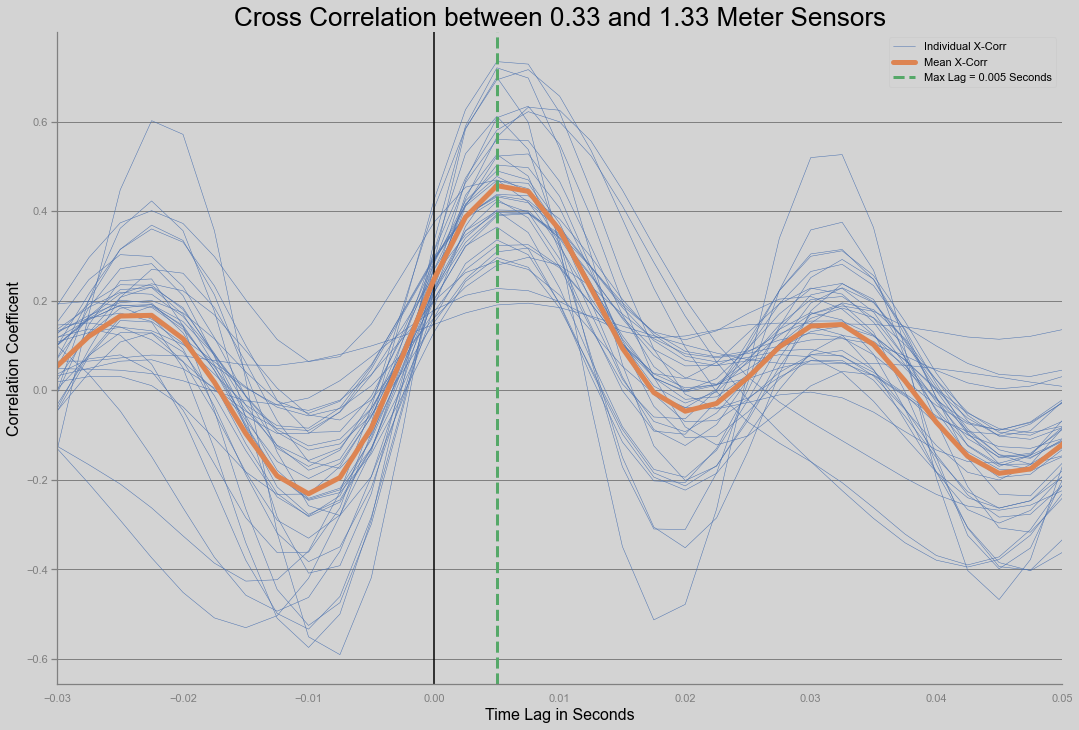

In [103]:
f, ax = plt.subplots()
for i, t in enumerate(sigs.keys()):
    a = sigs[t][1.33].values.ravel()
    b = sigs[t][0.33].values.ravel()

    cs = CubicSpline(np.linspace(0, len(a), len(a)), a)
    cs_xs = np.linspace(0, len(a), 2*len(a))
    a_cs = cs(cs_xs)

    cs = CubicSpline(np.linspace(0, len(a), len(a)), b)
    b_cs = cs(cs_xs)

    c, l = norm_correlate(a_cs, b_cs)
    l = l/400
    if i == 0:
        corrs = c
        ax.plot(l, c, color = 'C0', label = 'Individual X-Corr', linewidth = 0.5)
    else:
        corrs = corrs + c
        ax.plot(l, c, color = 'C0', linewidth = 0.5)
ax.set_xlim(-0.03, 0.05)
ax.axvline(0, color = 'black')
ax.plot(l, corrs/(i+1), color = 'C1', linewidth = 5, label = 'Mean X-Corr')
plt.title('Cross Correlation between 0.33 and 1.33 Meter Sensors')
ax.set_xlabel('Time Lag in Seconds')
ax.set_ylabel('Correlation Coefficent')

max_lag = l[np.argmax(corrs)]
ax.axvline(max_lag, color = 'C2', linewidth = 3, label = f'Max Lag = {max_lag} Seconds', linestyle = 'dashed')

ax.legend()
plt.savefig(join('/Users/zachkeskinen/Documents/infrasound/figures/speeds', 'xcorr033_133.png'))

In [101]:
print(1/0.005) 
print("m/s")

200.0
m/s


In [124]:
sigs.keys()

dict_keys(['2022-03-22T23:02:13.570Z', '2022-03-18T03:50:12.590Z', '2022-03-17T23:28:16.530Z', '2022-03-17T14:27:06.212Z', '2022-03-17T14:25:20.917Z', '2022-03-16T15:08:37.680Z', '2022-03-15T10:56:32.640Z', '2022-03-15T10:14:29.580Z', '2022-03-14T21:07:48.700Z', '2022-03-13T14:32:31.040Z', '2022-03-10T18:26:10.210Z', '2022-03-09T15:10:58.073Z', '2022-03-06T08:56:50.660Z', '2022-03-05T15:36:42.443Z', '2022-03-04T13:26:23.590Z', '2022-03-03T15:17:22.106Z', '2022-03-01T01:45:12.163Z', '2022-02-28T14:05:21.640Z', '2022-02-28T10:11:04.920Z', '2022-02-21T02:22:04.500Z', '2022-02-17T18:16:01.635Z', '2022-02-16T01:40:32.440Z', '2022-02-14T10:03:52.500Z', '2022-02-11T14:54:47.354Z', '2022-02-09T09:59:29.760Z', '2022-02-09T09:56:27.412Z', '2022-02-02T16:41:13.790Z', '2022-02-01T09:47:41.599Z', '2022-02-01T09:43:06.590Z', '2022-01-30T16:36:50.142Z', '2022-01-30T12:35:02.770Z', '2022-01-27T22:48:08.995Z', '2022-01-26T22:09:48.420Z', '2022-01-26T10:41:18.480Z', '2022-01-25T18:16:03.450Z', '2022-01-

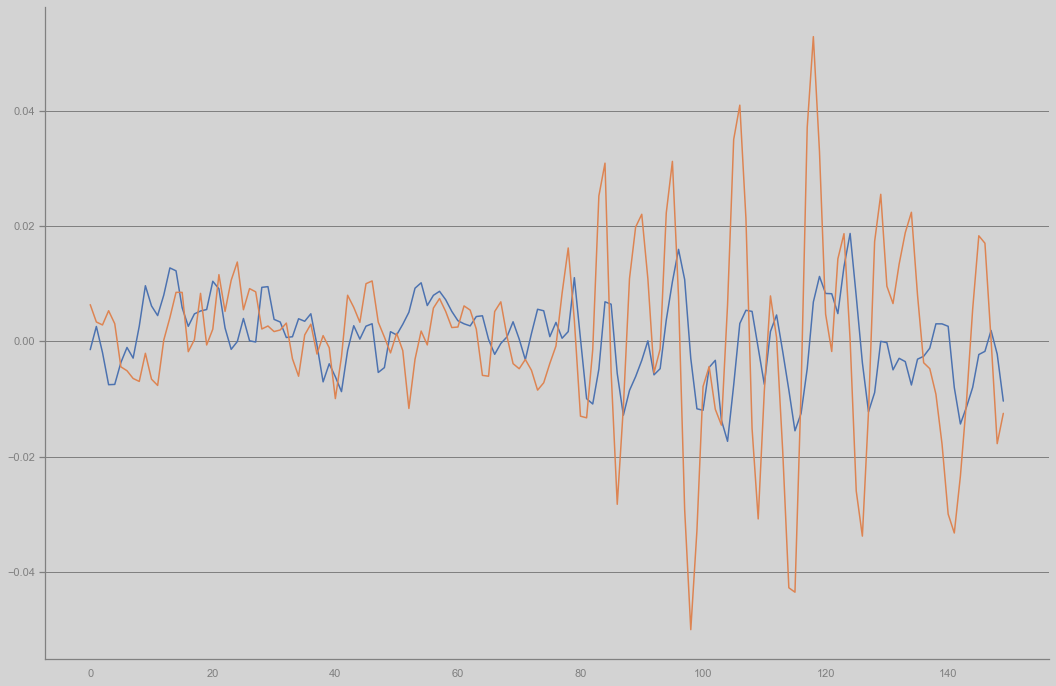

In [149]:
ids = 250
ide = 400
plt.plot(a[ids:ide])
plt.plot(b[ids:ide])

In [172]:
np.arctan2(-0.049290734549522056, -0.03737989015822622)

-2.219623421731648

In [200]:
A = np.fft.fft(a)
thres = np.max(np.abs(A)/5)
A[np.abs(A)< thres] = 0
phase = np.rad2deg(np.angle(A))

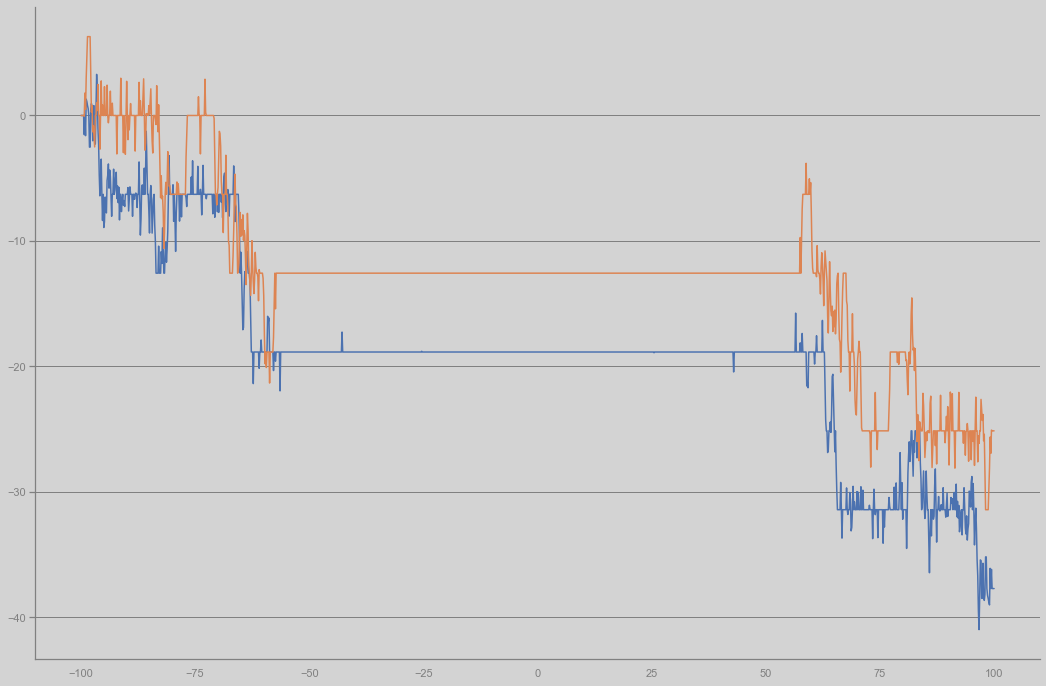

In [207]:
A = np.fft.fft(a)
thres = np.max(np.abs(A)/5)
A[np.abs(A)< thres] = 0
phase = np.rad2deg(np.angle(A))
f = np.linspace(-100, 100, len(a))
unw = np.unwrap(phase)
plt.plot(f, unw)

A = np.fft.fft(b)
thres = np.max(np.abs(A)/5)
A[np.abs(A)< thres] = 0
phase = np.rad2deg(np.angle(A))
f = np.linspace(-100, 100, len(a))
unw = np.unwrap(phase)
plt.plot(f, unw)

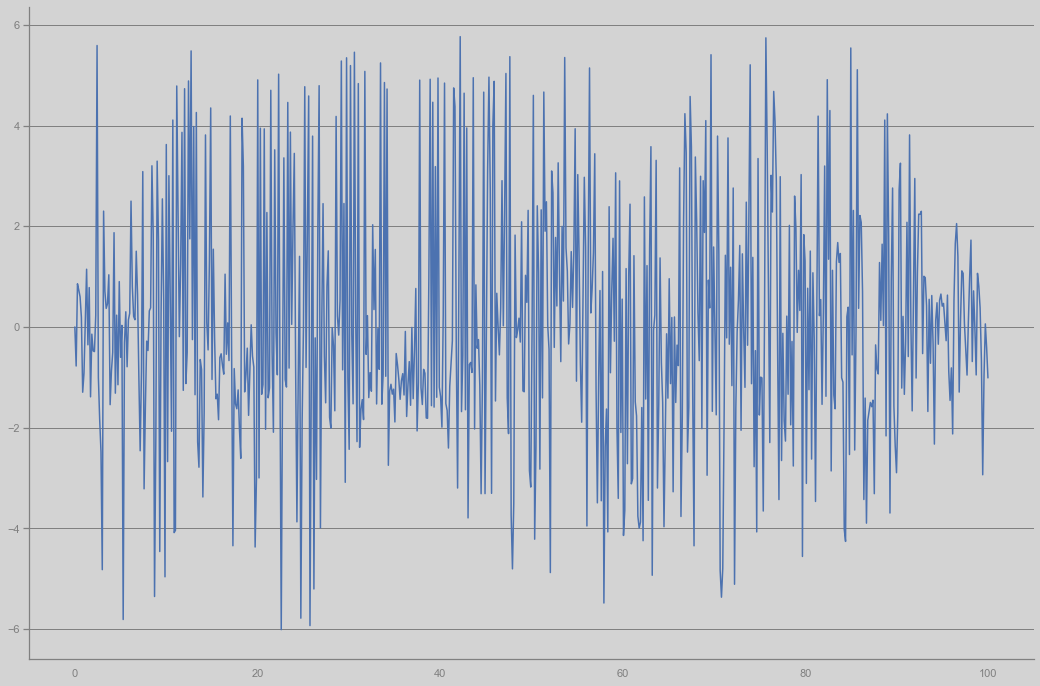

In [161]:
c = np.angle(np.fft.fft(a))[:int(len(a)/2)] - np.angle(np.fft.fft(b))[:int(len(a)/2)]
plt.plot(np.linspace(0, 100, int(len(a)/2)), c)

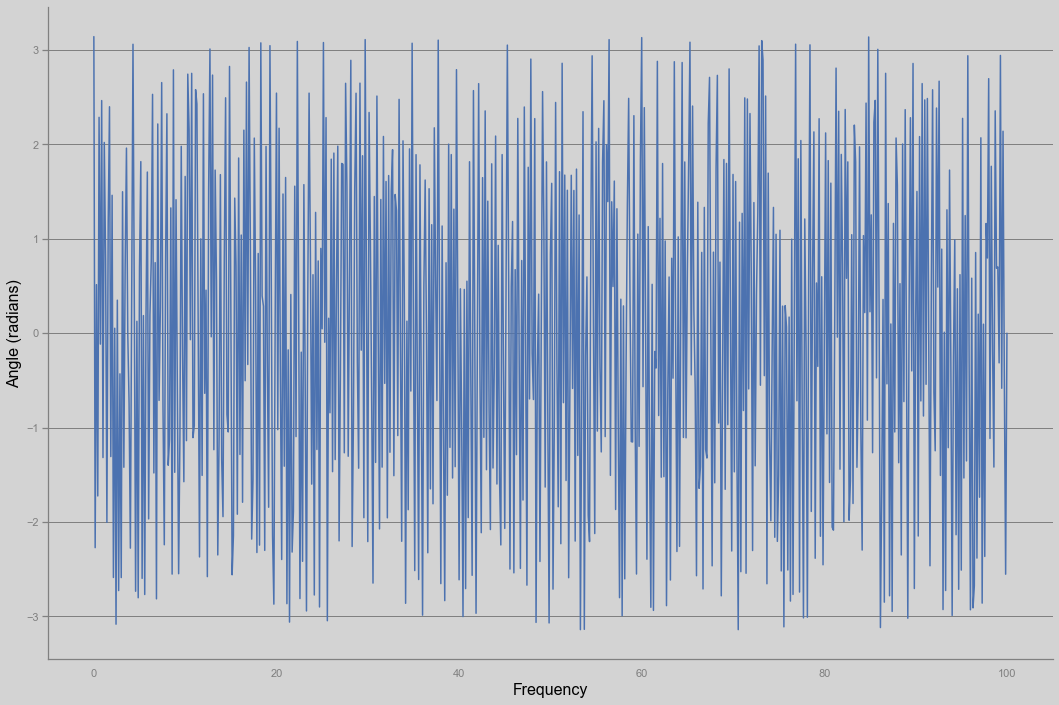

In [160]:
plt.angle_spectrum(a, Fs = 200)
plt.show()

(array([[ 3.14159265e+00,  0.00000000e+00,  3.14159265e+00, ...,
          3.14159265e+00,  0.00000000e+00,  3.14159265e+00],
        [ 5.59481999e+00,  2.50368905e+00,  1.41087385e-01, ...,
          4.48059241e+00,  2.63887252e+00,  4.78796927e-01],
        [ 8.63474794e+00,  5.43797372e+00,  2.94409026e+00, ...,
          7.52560861e+00, -8.68386688e-03,  3.36573453e+00],
        ...,
        [-1.26314096e+01,  4.18967639e+01, -1.82469928e+01, ...,
          4.05824276e+01,  5.83130368e+01, -2.48904058e+01],
        [-1.44507575e+01,  4.49823736e+01, -2.06324338e+01, ...,
          4.28110343e+01,  5.84717753e+01, -2.70713952e+01],
        [-1.25663706e+01,  4.71238898e+01, -2.19911486e+01, ...,
          4.08407045e+01,  5.65486678e+01, -2.51327412e+01]]),
 array([  0.     ,   0.78125,   1.5625 ,   2.34375,   3.125  ,   3.90625,
          4.6875 ,   5.46875,   6.25   ,   7.03125,   7.8125 ,   8.59375,
          9.375  ,  10.15625,  10.9375 ,  11.71875,  12.5    ,  13.28125,
       

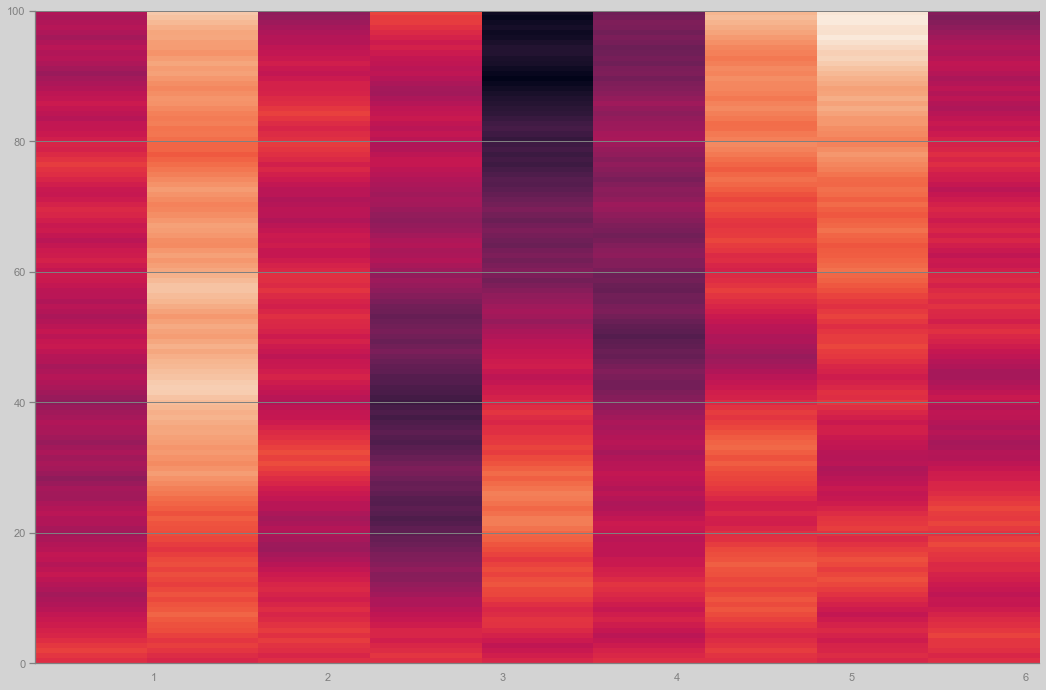

In [148]:
t = '2022-02-09T09:59:29.760Z'
a = sigs[t][1.33].values.ravel()
b = sigs[t][0.33].values.ravel()
plt.specgram(a, Fs = 200, mode = 'phase')
# spb, fsb, l = plt.phase_spectrum(b[ids:ide], Fs = 200)

    # sp_diff = spa-spb
    # sp_diff = np.rad2deg(sp_diff)
    # plt.plot(fsa, sp_diff)
    # plt.xlabel('Frequency (Hz)')

In [138]:
for f, rad in zip(fsa, sp_diff):
    print(f)
    t = 

Text(0.5, 0, 'Frequency (Hz)')

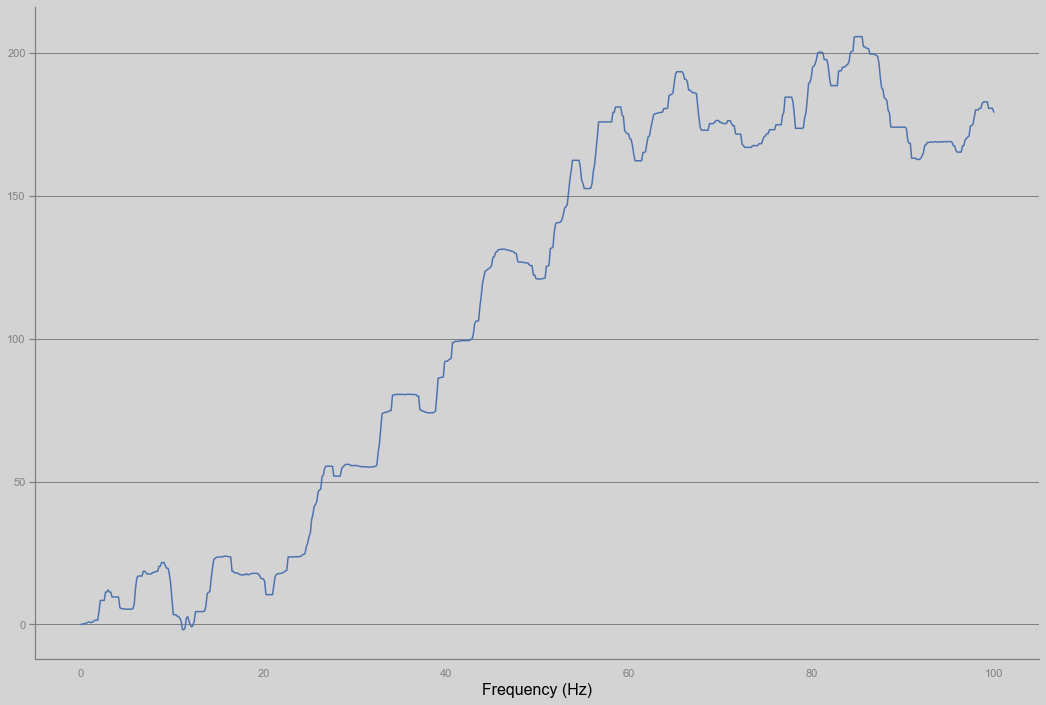

In [134]:
sp_diff = spa-spb
sp_diff = medfilt(sp_diff, 11)
plt.plot(fsa, sp_diff)
plt.xlabel('Frequency (Hz)')